C:\Users\MSI\AppData\Local\Temp\ipykernel_19772\3562996480.py:22: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_index = pd.date_range(start="09:30", periods=total_minutes, freq="T")


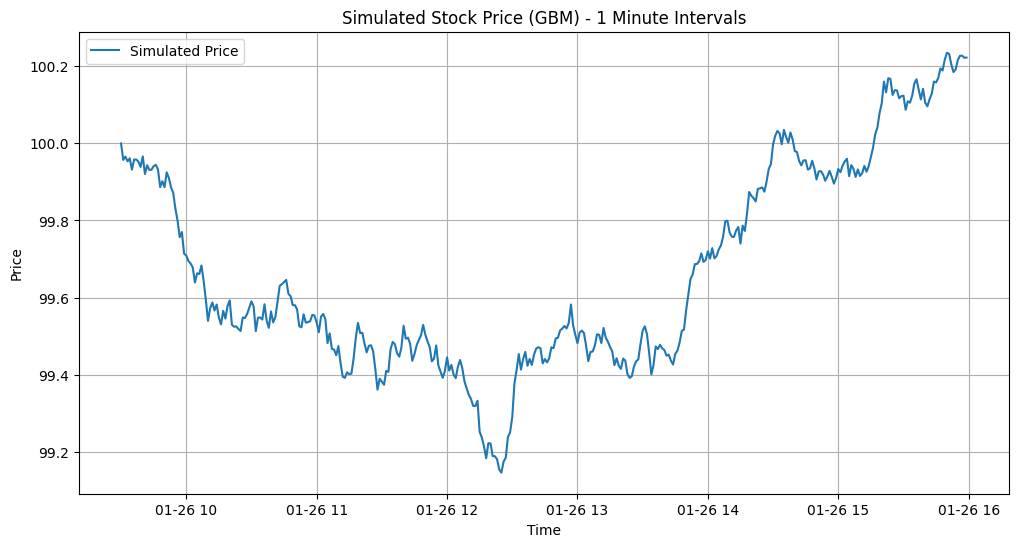

                         Price
2025-01-26 09:30:00  99.999635
2025-01-26 09:31:00  99.957064
2025-01-26 09:32:00  99.965400
2025-01-26 09:33:00  99.953189
2025-01-26 09:34:00  99.960843


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
S0 = 100  # Initial stock price
mu = 0.0002  # Drift (mean return per minute)
sigma = 0.01  # Volatility (standard deviation of returns per minute)
minutes = 390  # Number of minutes in a typical trading day
trading_days = 1  # Number of trading days to simulate

# Time steps
total_minutes = minutes * trading_days
dt = 1 / (60 * 24)  # One minute as a fraction of a day

# Generate random walk for GBM
random_shocks = np.random.normal(loc=0, scale=np.sqrt(dt), size=total_minutes)
returns = (mu - 0.5 * sigma**2) * dt + sigma * random_shocks
price_path = S0 * np.exp(np.cumsum(returns))

# Create a time index
time_index = pd.date_range(start="09:30", periods=total_minutes, freq="T")

# Create a DataFrame
df = pd.DataFrame(data={"Price": price_path}, index=time_index)

# Plot the simulated stock price
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Price"], label="Simulated Price")
plt.title("Simulated Stock Price (GBM) - 1 Minute Intervals")
plt.xlabel("Time")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.show()

# Display the first few rows
print(df.head())


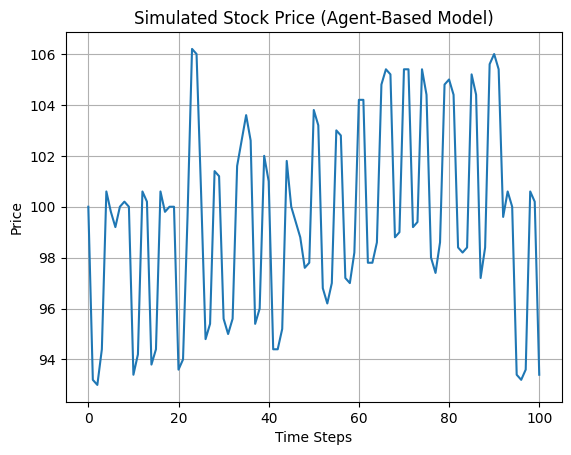

In [1]:
import random
import matplotlib.pyplot as plt

# Parameters
num_agents = 100
initial_price = 100
price = initial_price
agents = []

# Create agents
for _ in range(num_agents):
    agents.append({
        "cash": random.uniform(1000, 5000),
        "shares": random.randint(0, 50),
        "strategy": random.choice(["fundamental", "technical", "random"])
    })

# Market dynamics
prices = [price]
for t in range(100):
    demand = 0
    supply = 0

    for agent in agents:
        if agent["strategy"] == "fundamental":
            if price < 100:  # Assume fundamental value is 100
                demand += 1
            else:
                supply += 1
        elif agent["strategy"] == "technical":
            if len(prices) > 1 and prices[-1] > prices[-2]:  # Trend-following
                demand += 1
            else:
                supply += 1
        elif agent["strategy"] == "random":
            if random.random() > 0.5:
                demand += 1
            else:
                supply += 1

    # Update price based on excess demand/supply
    excess_demand = demand - supply
    price += 0.1 * excess_demand
    prices.append(price)

# Plot results
plt.plot(prices)
plt.title("Simulated Stock Price (Agent-Based Model)")
plt.xlabel("Time Steps")
plt.ylabel("Price")
plt.grid()
plt.show()


In [2]:
# trying to imitate Rigetti Computing, Inc. (RGTI)  stock price 


num_agents = 10_000_000
total_liquid_cash = fifty_trillion = 5e13  # Equivalent to 5 × 10^13


"""
[liquid_cash,
news_perceivement,
method_inclination [fundamental, technical, eventbased],
risk_tolerance,
connectivity
]

"""

'\n[liquid_cash,\nnews_perceivement,\nmethod_inclination [fundamental, technical, eventbased],\nrisk_tolerance,\nconnectivity\n]\n\n'

Minimum wealth: 0.00015979716419792402
Maximum wealth: 1,667,902,037,012.6074 one trillion, six hundred and sixty-seven billion, nine hundred and two million, thirty-seven thousand and twelve point six zero seven four
Average wealth: 583,333
Median wealth: 94,241
Average of 1000 agents: 854,836.5754904051


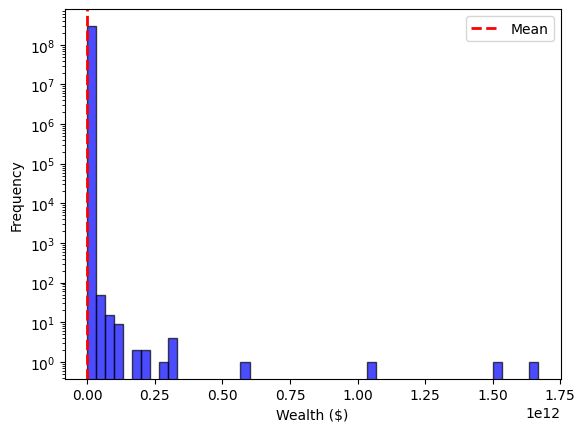

In [3]:
# Wealth simulation with pareto distribution 
import numpy as np
import matplotlib.pyplot as plt
import inflect

# Create an engine for converting numbers to words
InfEngine = inflect.engine()

number_of_agents = 300_000_000
total_wealth = 175_000_000_000_000

alpha = 1.2

wealth_distribution = np.random.pareto(alpha, number_of_agents) 
wealth_distribution *= total_wealth / wealth_distribution.sum() 

print(f"Minimum wealth: {wealth_distribution.min():,}")
print(f"Maximum wealth: {wealth_distribution.max():,} {InfEngine.number_to_words(wealth_distribution.max())}")
print(f"Average wealth: {wealth_distribution.mean():,.0f}")
print(f"Median wealth: {np.median(wealth_distribution):,.0f}") 
print(f'Average of 1000 agents: {np.random.choice(wealth_distribution, 1000).mean():,}')

# Plotting the histogram
plt.hist(wealth_distribution, bins=50, alpha=0.7, color='blue', edgecolor='black', log=True)
plt.axvline(np.mean(wealth_distribution), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.xlabel("Wealth ($)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Generated 100000000 wealth values
Total wealth: 31,808,299,551,416
Alpha: 1.1718608751843207
Minimum wealth: 50,000.00043732056
Maximum wealth: 651,508,253,463.6702
Average wealth: 318,083
Median wealth: 90,332
Average of 1000 agents: 338,362.824929192


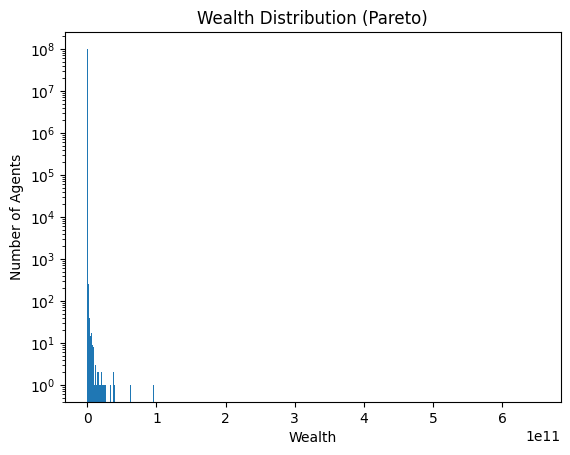

In [74]:
import numpy as np

# Define parameters
num_agents = 100_000_000  # 100 million agents
desired_average_wealth = 340_933
desired_total_wealth = num_agents * desired_average_wealth
x_min = 50_000
alpha = desired_average_wealth /(desired_average_wealth - x_min)  # Pareto shape parameter

# Generate Pareto-distributed wealth values
wealth_distribution = (np.random.pareto(alpha, num_agents) + 1) * x_min


# Print key statistics
print(f"Generated {num_agents} wealth values")
print(f"Total wealth: {wealth_distribution.sum():,.0f}")
print(f"Alpha: {alpha}")
print(f"Minimum wealth: {wealth_distribution.min():,}")
print(f"Maximum wealth: {wealth_distribution.max():,}")
print(f"Average wealth: {wealth_distribution.mean():,.0f}")
print(f"Median wealth: {np.median(wealth_distribution):,.0f}") 
print(f'Average of 1000 agents: {np.random.choice(wealth_distribution, 1000).mean():,}')

plt.hist(wealth_distribution, bins=1000, log=True)
plt.title("Wealth Distribution (Pareto)")
plt.xlabel("Wealth")
plt.ylabel("Number of Agents")
plt.show()

Average minimum: 57,000.004772373075
Average maximum: 73,128,004,377.467
Average averages: 326,446.0101454714


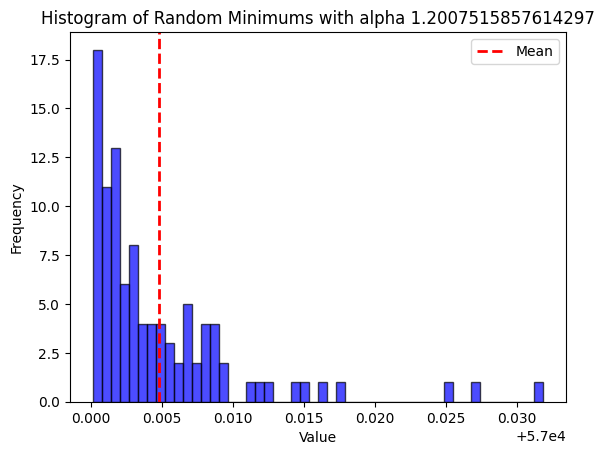

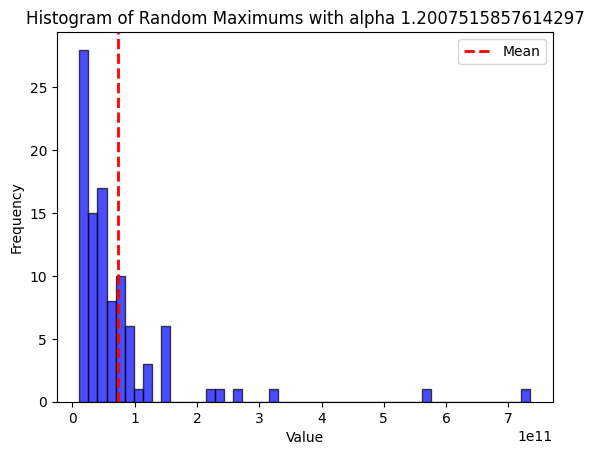

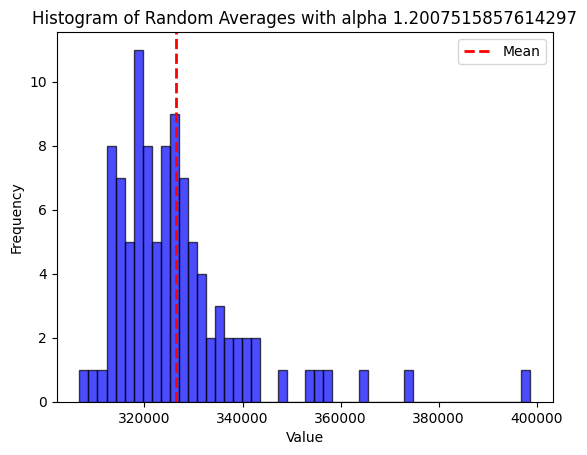

In [77]:
# Define parameters
num_agents = 10_000_000  # 10 million agents
desired_average_wealth = 340_933
total_wealth = num_agents * desired_average_wealth
x_min = 57_000
alpha = desired_average_wealth /(desired_average_wealth - x_min)  # Pareto shape parameter

# Generate Pareto-distributed wealth values

minimums = []
maximums = []
averages = []

for x in range(100):
    wealth_distribution = (np.random.pareto(alpha, num_agents) + 1) * x_min

    minimums.append(wealth_distribution.min())
    maximums.append(wealth_distribution.max())
    averages.append(wealth_distribution.mean())

print(f"Average minimum: {np.mean(minimums):,}")
print(f"Average maximum: {np.mean(maximums):,}")
print(f"Average averages: {np.mean(averages):,}")


plt.hist(minimums, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(np.mean(minimums), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title(f"Histogram of Random Minimums with alpha {alpha}")
plt.legend()
plt.show()

plt.hist(maximums, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(np.mean(maximums), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title(f"Histogram of Random Maximums with alpha {alpha}")
plt.legend()
plt.show()

plt.hist(averages, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(np.mean(averages), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title(f"Histogram of Random Averages with alpha {alpha}")
plt.legend()
plt.show()




Configured with alpha = 2, x_min = 170466.50
Mean of generated wealth distribution: 341,445


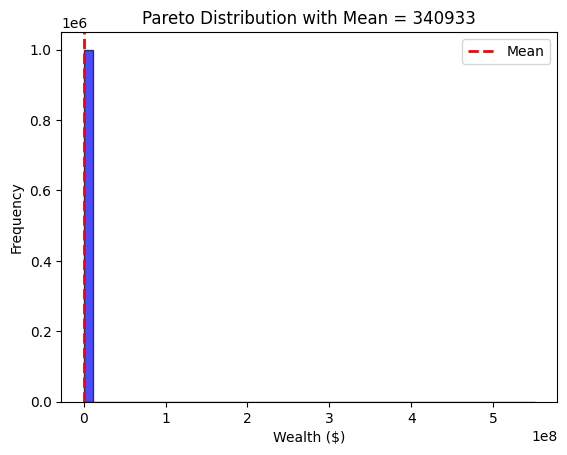

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Desired mean
desired_mean = 340_933

# Chosen alpha (shape parameter)
alpha = 2

# Calculate x_min for the desired mean
x_min = desired_mean * (alpha - 1) / alpha

# Generate Pareto-distributed data
num_agents = 1000000
wealth_distribution = (np.random.pareto(alpha, num_agents) + 1) * x_min

# Print the configuration and verify mean
print(f"Configured with alpha = {alpha}, x_min = {x_min:.2f}")
print(f"Mean of generated wealth distribution: {np.mean(wealth_distribution):,.0f}")

# Plotting the histogram
plt.hist(wealth_distribution, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(np.mean(wealth_distribution), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.xlabel("Wealth ($)")
plt.ylabel("Frequency")
plt.title(f"Pareto Distribution with Mean = {desired_mean}")
plt.legend()
plt.show()


Configured with alpha = 1.19, x_min = 10000
Mean of generated wealth distribution: 59,136


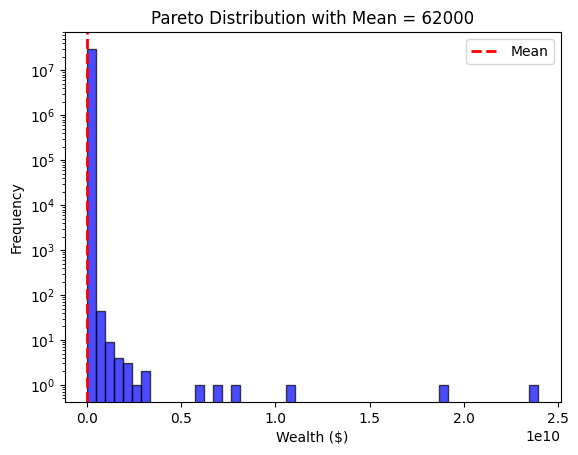

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Desired mean and chosen x_min (scale parameter)
desired_mean = 62000
x_min = 10000

# Calculate alpha for the desired mean
alpha = desired_mean / (desired_mean - x_min)

# Generate Pareto-distributed wealth
num_agents = 30000000
wealth_distribution = (np.random.pareto(alpha, num_agents) + 1) * x_min

# Print the configuration and verify mean
print(f"Configured with alpha = {alpha:.2f}, x_min = {x_min}")
print(f"Mean of generated wealth distribution: {np.mean(wealth_distribution):,.0f}")

# Plotting the histogram
plt.hist(wealth_distribution, bins=50, alpha=0.7, color='blue', edgecolor='black', log=True)
plt.axvline(np.mean(wealth_distribution), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.xlabel("Wealth ($)")
plt.ylabel("Frequency")
plt.title(f"Pareto Distribution with Mean = {desired_mean}")
plt.legend()
plt.show()


Theoretical expected number of players: 79.45
Simulated average number of players: 79.47
Difference: 0.02


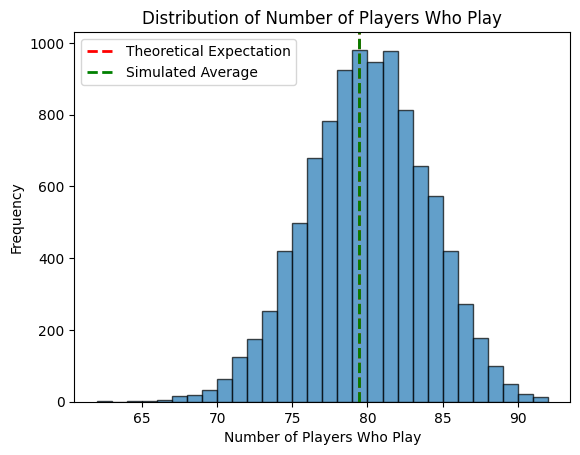

In [2]:
import numpy as np
from scipy.stats import norm, truncnorm

# Parameters
mu = 0.8
sigma = 0.1
n_players = 100
n_trials = 10_000  # Number of simulation trials

# Theoretical expected number of players (E[S] = n_players * E[p])
a, b = 0, 1  # Truncation bounds
# Compute E[p] for truncated normal
alpha = (a - mu) / sigma
beta = (b - mu) / sigma
E_p = mu + sigma * (norm.pdf(alpha) - norm.pdf(beta)) / (norm.cdf(beta) - norm.cdf(alpha))
E_S_theoretical = n_players * E_p
print(f"Theoretical expected number of players: {E_S_theoretical:.2f}")

# Simulation
np.random.seed(42)  # For reproducibility
results = []

for _ in range(n_trials):
    # Draw p for each player from truncated normal
    p_samples = truncnorm.rvs(alpha, beta, loc=mu, scale=sigma, size=n_players)
    # Perform Bernoulli trials
    plays = np.random.rand(n_players) < p_samples
    n_plays = np.sum(plays)
    results.append(n_plays)

# Empirical average
E_S_simulated = np.mean(results)
print(f"Simulated average number of players: {E_S_simulated:.2f}")

# Compare
print(f"Difference: {abs(E_S_theoretical - E_S_simulated):.2f}")

# Plot histogram of results
import matplotlib.pyplot as plt
plt.hist(results, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(E_S_theoretical, color='red', linestyle='dashed', linewidth=2, label='Theoretical Expectation')
plt.axvline(E_S_simulated, color='green', linestyle='dashed', linewidth=2, label='Simulated Average')
plt.xlabel('Number of Players Who Play')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Players Who Play')
plt.legend()
plt.show()

Fitted n (dispersion): 4.77
Fitted p (prob): 0.0095
Fitted mean: 499.71
Fitted variance: 52805.42


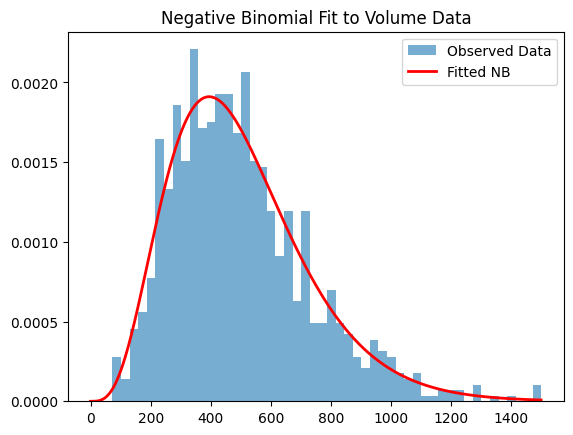

In [1]:
import numpy as np  
from scipy.stats import nbinom  
from scipy.optimize import minimize  
import matplotlib.pyplot as plt  

# Generate synthetic volume data (Negative Binomial)  
np.random.seed(42)  
true_n, true_p = 5, 0.01  # True parameters (n=dispersion, p=prob)  
volume = nbinom.rvs(true_n, true_p, size=1000)  

# Define Negative Log-Likelihood for MLE  
def neg_log_likelihood(params, data):  
    n, p = params  
    return -np.sum(nbinom.logpmf(data, n, p))  

# Initial guess (n > 0, 0 < p < 1)  
initial_guess = [1, 0.5]  

# Optimize (minimize negative log-likelihood)  
result = minimize(  
    neg_log_likelihood,  
    initial_guess,  
    args=(volume),  
    bounds=[(0.1, 100), (0.001, 0.999)]  # Constrain n > 0, 0 < p < 1  
)  

fitted_n, fitted_p = result.x  
fitted_mean = fitted_n * (1 - fitted_p) / fitted_p  # Mean = n*(1-p)/p  
fitted_var = fitted_n * (1 - fitted_p) / (fitted_p ** 2)  # Variance  

print(f"Fitted n (dispersion): {fitted_n:.2f}")  
print(f"Fitted p (prob): {fitted_p:.4f}")  
print(f"Fitted mean: {fitted_mean:.2f}")  
print(f"Fitted variance: {fitted_var:.2f}")  

# Plot  
plt.hist(volume, bins=50, density=True, alpha=0.6, label="Observed Data")  
x = np.arange(0, max(volume))  
plt.plot(x, nbinom.pmf(x, fitted_n, fitted_p), 'r-', lw=2, label="Fitted NB")  
plt.title("Negative Binomial Fit to Volume Data")  
plt.legend()  
plt.show()  

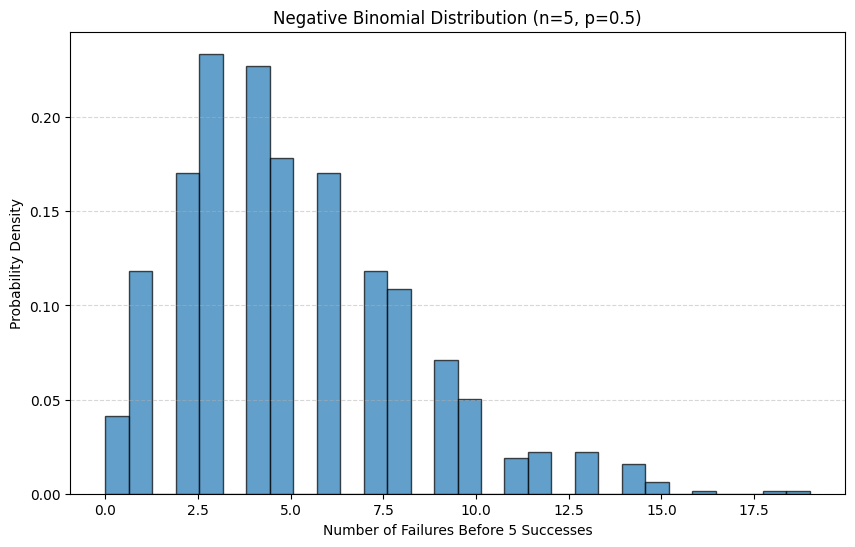

Sample Mean: 5.06 (Theoretical: 5.00)
Sample Variance: 9.81 (Theoretical: 10.00)
Min: 0, Max: 19


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 5     # Number of successes ("dispersion" parameter)
p = 0.5   # Probability of success per trial
sample_size = 1000  # Number of samples to generate

# Generate samples
samples = np.random.negative_binomial(n, p, sample_size)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=30, density=True, alpha=0.7, color='#1f77b4', edgecolor='black')
plt.title(f'Negative Binomial Distribution (n={n}, p={p})')
plt.xlabel('Number of Failures Before 5 Successes')
plt.ylabel('Probability Density')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Print summary stats
print(f"Sample Mean: {np.mean(samples):.2f} (Theoretical: {n*(1-p)/p:.2f})")
print(f"Sample Variance: {np.var(samples):.2f} (Theoretical: {n*(1-p)/p**2:.2f})")
print(f"Min: {np.min(samples)}, Max: {np.max(samples)}")

In [8]:
import pandas as pd
import numpy as np
from scipy.stats import truncnorm

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
n_days = 100
mean_volume = 2_000_000    # Typical daily volume for ROKU
std_volume = 500_000       # Daily volume variability
mean_trade_size = 150      # Target average trade size (shares)
trade_size_std = 40        # Standard deviation for trade size (must be > 0)

# Generate synthetic data
df = pd.DataFrame({
    "Date": pd.date_range(start="2023-01-01", periods=n_days),
    "Volume": np.abs(np.random.normal(mean_volume, std_volume, n_days)).astype(int),  # Ensure Volume > 0
})

# Generate lognormally distributed trade sizes (bounded to [50, 500] shares)
log_mean = np.log(mean_trade_size)  # Mean of the underlying normal distribution
log_std = np.log(1 + (trade_size_std / mean_trade_size))  # CV formula: sigma = sqrt(exp(log_std^2) - 1)

# Bounds (min=50, max=500 shares)
a = (np.log(50) - log_mean) / log_std
b = (np.log(500) - log_mean) / log_std
df["AvgTradeSize"] = np.exp(truncnorm.rvs(a, b, loc=log_mean, scale=log_std, size=n_days)).astype(int)

# Derive approximate number of trades
df["Trades"] = (df["Volume"] / df["AvgTradeSize"]).astype(int)

print(df.head())

        Date   Volume  AvgTradeSize  Trades
0 2023-01-01  2248357           142   15833
1 2023-01-02  1930867           125   15446
2 2023-01-03  2323844           113   20564
3 2023-01-04  2761514           135   20455
4 2023-01-05  1882923           217    8677


In [9]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Negative Binomial Regression
model = smf.glm(
    formula="Volume ~ AvgTradeSize",
    data=df,
    family=sm.families.NegativeBinomial()
).fit()

print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Volume   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1548.2
Date:                Fri, 11 Apr 2025   Deviance:                       6.0098
Time:                        20:36:15   Pearson chi2:                     5.35
No. Iterations:                     4   Pseudo R-squ. (CS):          0.0006963
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       14.3683      0.443     32.413   

c:\Users\MSI\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


C:\Users\MSI\AppData\Local\Temp\ipykernel_27920\1858612320.py:9: RuntimeWarning: invalid value encountered in scalar divide
  return (alpha * x_min**alpha / x**(alpha + 1)) * normalization


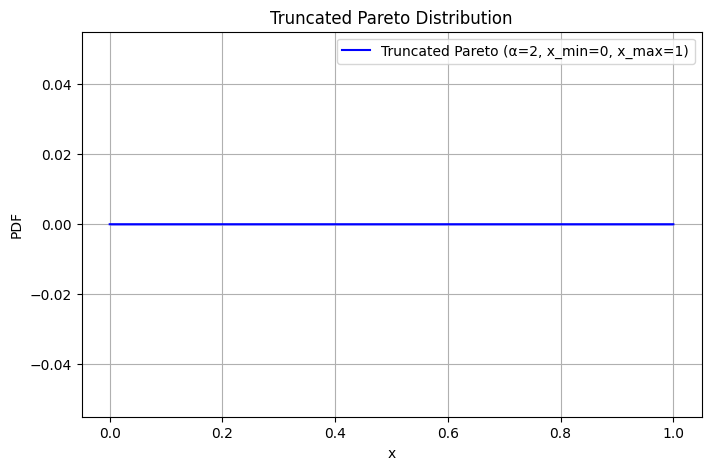

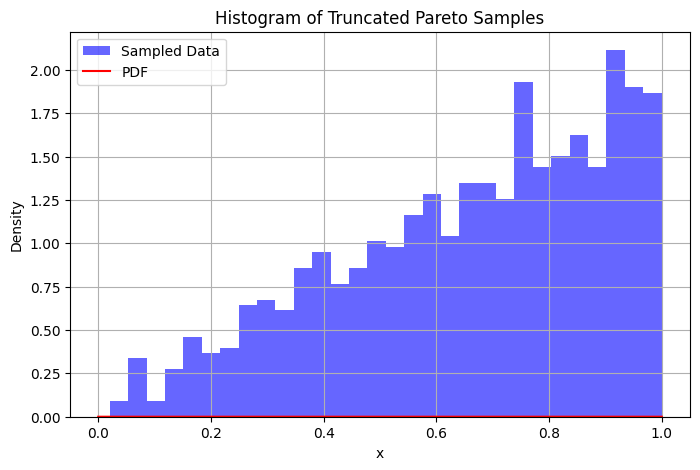

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def truncated_pareto_pdf(x, alpha, x_min=0, x_max=1):
    """Compute the PDF of a truncated Pareto distribution."""
    if x < x_min or x > x_max:
        return 0
    normalization = 1 / (1 - (x_min / x_max) ** alpha)
    return (alpha * x_min**alpha / x**(alpha + 1)) * normalization

def sample_truncated_pareto(alpha, x_min=0, x_max=1, size=1000):
    """Generate random samples from a truncated Pareto distribution."""
    u = np.random.uniform(0, 1, size)
    return ((x_max**alpha - x_min**alpha) * u + x_min**alpha) ** (1 / alpha)

# Parameters
alpha = 2  # Shape parameter
x_min = 0  # Lower bound
x_max = 1  # Upper bound

# Generate x values and compute PDF
x_values = np.linspace(x_min, x_max, 10000)
pdf_values = [truncated_pareto_pdf(x, alpha, x_min, x_max) for x in x_values]

# Plot the truncated Pareto PDF
plt.figure(figsize=(8, 5))
plt.plot(x_values, pdf_values, label=f"Truncated Pareto (α={alpha}, x_min={x_min}, x_max={x_max})", color='b')
plt.fill_between(x_values, pdf_values, alpha=0.3, color='b')
plt.xlabel("x")
plt.ylabel("PDF")
plt.title("Truncated Pareto Distribution")
plt.legend()
plt.grid()
plt.show()

# Generate and plot random samples
samples = sample_truncated_pareto(alpha, x_min, x_max, size=1000)
plt.figure(figsize=(8, 5))
plt.hist(samples, bins=30, density=True, alpha=0.6, color='b', label="Sampled Data")
plt.plot(x_values, pdf_values, 'r-', label="PDF")
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Histogram of Truncated Pareto Samples")
plt.legend()
plt.grid()
plt.show()



News initially affects 376 people.


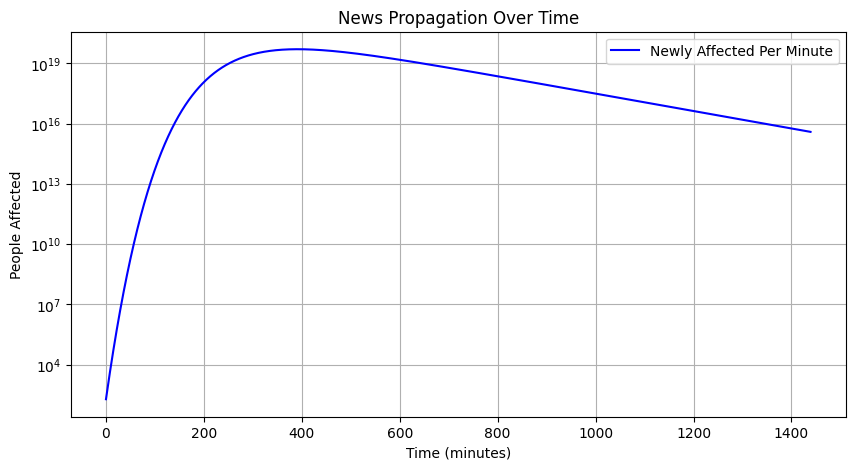

Total affected people after simulation: 13713427927435665445963


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 2.5        # Power-law exponent for initial news impact
min_impact = 10    # Minimum number of initially affected people
max_impact = 10000 # Maximum number of initially affected people
decay_rate = 0.01  # Rate at which news loses relevance (higher means faster decay)
spread_factor = 0.5  # Fraction of affected people who share per minute initially
time_steps = 1440   # Number of minutes to simulate (e.g., 1 day)

# Step 1: Generate initial affected population (X) from a power-law distribution
def generate_initial_impact(alpha, min_impact, max_impact):
    while True:
        impact = int(np.random.pareto(alpha) * (max_impact - min_impact) + min_impact)
        if min_impact <= impact <= max_impact:
            return impact

initial_affected = generate_initial_impact(alpha, min_impact, max_impact)
print(f"News initially affects {initial_affected} people.")

# Step 2: Simulate news spread over time
time = np.arange(time_steps)  # Time in minutes
affected_over_time = []       # Track how many people are affected each minute
total_affected = initial_affected

for t in time:
    # Spread rate follows exponential decay
    spread_rate = spread_factor * np.exp(-decay_rate * t)
    
    # New people affected at this time step
    new_affected = int(total_affected * spread_rate)
    
    # Stop simulation if spread is negligible
    if new_affected < 1:
        break
    
    total_affected += new_affected
    affected_over_time.append(new_affected)

# Step 3: Plot the spread of news over time
plt.figure(figsize=(10, 5))
plt.plot(range(len(affected_over_time)), affected_over_time, color='blue', label="Newly Affected Per Minute")
plt.xlabel("Time (minutes)")
plt.ylabel("People Affected")
plt.title("News Propagation Over Time")
plt.yscale("log")  # Log scale to better see the pattern
plt.grid(True)
plt.legend()
plt.show()

print(f"Total affected people after simulation: {total_affected}")


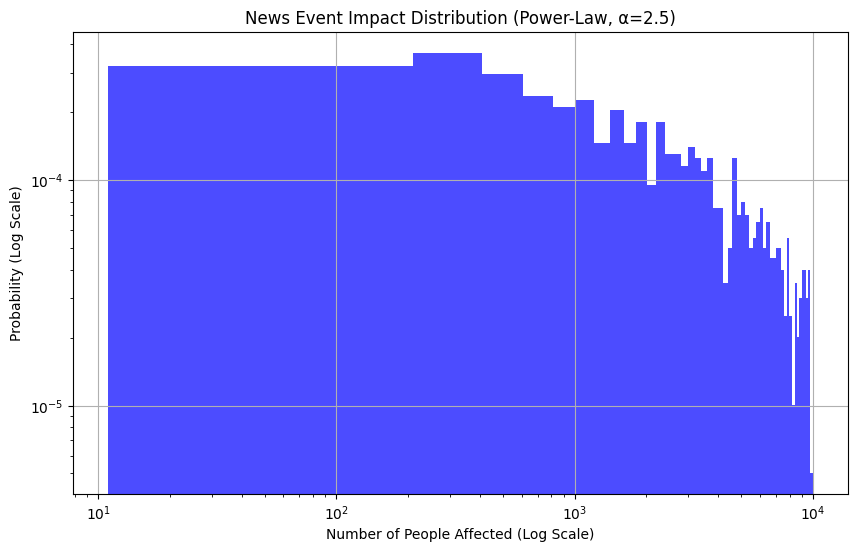

Sample news impacts (number of people affected by events):
[ 858 2916 1083 3628 9110  124 2483 4163  234 3419]


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 2.5  # Power-law exponent, controls the steepness of the distribution
num_events = 1000  # Number of news events to simulate
min_impact = 10  # Minimum number of people affected (e.g., 10 people)
max_impact = 10000  # Maximum number of people affected (e.g., 10,000 people)

# Function to simulate news impact based on power-law distribution
def generate_power_law_impact(alpha, min_impact, max_impact, num_events):
    impacts = []
    while len(impacts) < num_events:
        # Generate a random number in the range [min_impact, max_impact] following power law
        impact = int(np.random.pareto(alpha) * (max_impact - min_impact) + min_impact)
        if min_impact <= impact <= max_impact:
            impacts.append(impact)
    return impacts

# Generate impacts for news events
news_impacts = generate_power_law_impact(alpha, min_impact, max_impact, num_events)

# Plotting the distribution of news impacts
plt.figure(figsize=(10, 6))
plt.hist(news_impacts, bins=50, density=True, color='blue', alpha=0.7)
plt.xscale('log')  # Log scale for better visualization of power-law
plt.yscale('log')  # Log scale for better visualization of power-law
plt.title(f'News Event Impact Distribution (Power-Law, α={alpha})')
plt.xlabel('Number of People Affected (Log Scale)')
plt.ylabel('Probability (Log Scale)')
plt.grid(True)
plt.show()

# Print some sample impacts
print("Sample news impacts (number of people affected by events):")
print(np.random.choice(news_impacts, 10))  # Print 10 random impacts


In [13]:
import numpy as np

# Parameters
alpha = 2
beta = 5
n = 100
num_trials = 10000  # How many times we repeat the process to get a good estimate

# Store results
sums = []

for _ in range(num_trials):
    beta_samples = np.random.beta(alpha, beta, n)
    bernoulli_trials = np.random.binomial(1, beta_samples)
    total = np.sum(bernoulli_trials)
    sums.append(total)

# Convert to NumPy array for stats
sums = np.array(sums)

# Empirical results
empirical_mean = np.mean(sums)
empirical_var = np.var(sums)

# Theoretical results
mu = alpha / (alpha + beta)
theoretical_mean = n * mu
theoretical_var = n * (alpha * beta) / (alpha + beta)**2

# Output
print(f"Empirical Mean: {empirical_mean:.4f}")
print(f"Theoretical Mean: {theoretical_mean:.4f}")
print(f"Empirical Variance: {empirical_var:.4f}")
print(f"Theoretical Variance: {theoretical_var:.4f}")


Empirical Mean: 28.5156
Theoretical Mean: 28.5714
Empirical Variance: 19.9624
Theoretical Variance: 20.4082


In [ ]:
import pandas as pd

residual_df = pd.read_csv(
    "ROKU_rand60_residuals.csv",
    index_col=0,
    parse_dates=True,
    date_format="%H:%M:%S"
)
residual_df.index = residual_df.index.time

seasonal_df = pd.read_csv(
    "ROKU_rand60_seasonal.csv",
    index_col=0,
    parse_dates=True,
    date_format="%H:%M:%S"
)
seasonal_df.index = seasonal_df.index.time


In [32]:
### Normalize the seasonal data ###
if seasonal_df.min().item() < 0 :
    seasonal_df += abs(seasonal_df.min())

In [35]:
min_idx = seasonal_df['seasonal'].idxmin()

if seasonal_df.loc[min_idx, 'seasonal'] == 0:
    seasonal_df.loc[min_idx, 'seasonal'] += 1e-6

In [36]:
seasonal_df.min()

seasonal    0.000001
dtype: float64

In [37]:
Ta = 300_000_000

beta_df = (residual_df['resid']*(Ta + 1))/(2*seasonal_df['seasonal'])
beta_df

00:00:00    2.838358e+10
00:01:00    2.835846e+10
00:02:00    2.831803e+10
00:03:00    2.642954e+10
00:04:00    2.479429e+10
                ...     
23:55:00    2.959537e+10
23:56:00    2.942526e+10
23:57:00    2.928049e+10
23:58:00    2.882858e+10
23:59:00    2.847380e+10
Length: 1440, dtype: float64

In [27]:
with pd.option_context('display.float_format', '{:.15f}'.format):
    print(beta_df)

00:00:00   28383579734.757987976074219
00:01:00   28358459962.876991271972656
00:02:00   28318025413.463306427001953
00:03:00   26429541285.526973724365234
00:04:00   24794286380.327732086181641
                       ...            
23:55:00   29595365477.315883636474609
23:56:00   29425259320.819698333740234
23:57:00   29280487448.169315338134766
23:58:00   28828580398.438526153564453
23:59:00   28473796921.469139099121094
Length: 1440, dtype: float64


In [97]:
import pandas as pd
import numpy as np
from scipy.stats import betabinom

# Assume `seasonal` and `residual` are Series with 1440 (minutes) long
# Ensure positive alpha and beta


sample_i = betabinom.rvs(n=Ta, a=seasonal_df.values, b=beta_df.values)


len(sample_i)

1440

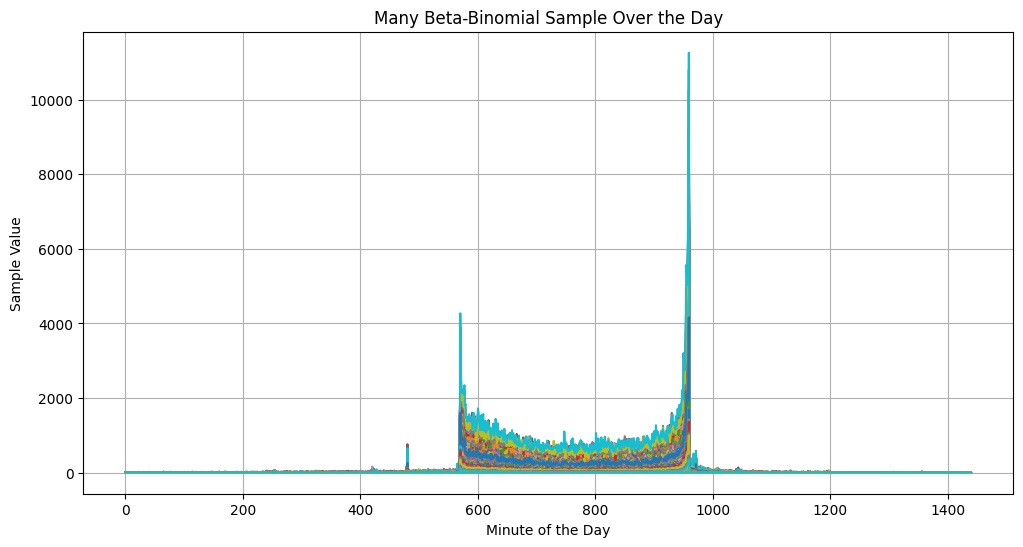

In [99]:
import matplotlib.pyplot as plt

# Plot the sample over the day (1440 minutes)
plt.figure(figsize=(12, 6))
plt.plot(sample_i)
plt.title("Many Beta-Binomial Sample Over the Day")
plt.xlabel("Minute of the Day")
plt.ylabel("Sample Value")
plt.grid(True)
plt.show()

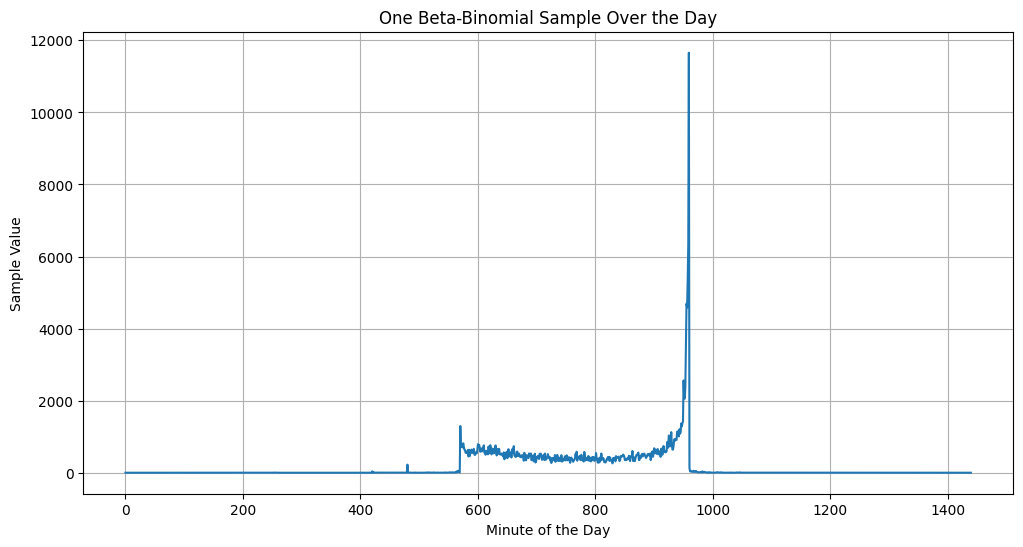

In [95]:
### Check ###

samples_of_day = []
for idx in seasonal_df.index:
    sample_i = betabinom.rvs(n=Ta, a=seasonal_df.loc[idx], b=beta_df.loc[idx])
    samples_of_day.append(sample_i)

# Plot the sample over the day (1440 minutes)
plt.figure(figsize=(12, 6))
plt.plot(samples_of_day)
plt.title("One Beta-Binomial Sample Over the Day")
plt.xlabel("Minute of the Day")
plt.ylabel("Sample Value")
plt.grid(True)
plt.show()